In [4]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from main import findAns,readExamples
import tracemalloc
import time

In [14]:
rec = pd.read_csv('results.csv')
rec.head(15)

,DFSTime,BFSTime,IDSTime,UCSTime,AstarTime,DFSMemory,BFSMemory,IDSMemory,UCSMemory,AstarMemory
0,4.003,0.161,0.828,0.167,0.191,0.036514,0.029240,0.025651,0.023544,0.024736
1,7.962,0.353,1.049,0.476,0.664,0.028320,0.155827,0.020100,0.138411,0.147155
2,1.926,0.127,0.789,0.116,0.135,0.014536,0.006056,0.016320,0.006016,0.006256
3,4.435,0.144,0.977,0.203,0.227,0.014608,0.027712,0.011824,0.027872,0.029464
4,5.155,0.122,0.899,0.127,0.133,0.012848,0.008408,0.011416,0.008408,0.009331
5,9.556,0.133,0.815,0.133,0.158,0.015488,0.008872,0.011245,0.008976,0.009520
6,3.776,0.156,0.917,0.135,0.141,0.012236,0.005616,0.011968,0.005616,0.005976
7,4.315,0.099,0.822,0.137,0.130,0.013248,0.004128,0.011704,0.004232,0.004368
8,2.511,0.097,0.805,0.101,0.121,0.011972,0.003456,0.011440,0.003456,0.003648
9,5.194,0.094,0.218,0.128,0.099,0.013240,0.002072,0.003152,0.003064,0.002096


In [54]:
examples = readExamples()
ans = pd.read_csv('answersNaN.csv')
rec = pd.read_csv('resultsNaN.csv')

notFound = False
for i in range(0,50):
    for j in range(0,5):
        max_depht = 30
        if np.isnan(rec.iloc[i,j]):
            print(i,j)
            while rec.iloc[i,j] == None or np.isnan(rec.iloc[i,j]) or rec.iloc[i,j] == math.inf:
                startTime = time.time()
                if j == 0:
                    tracemalloc.start()
                    act = findAns('DFS',examples[i],max_depht) 
                    if act != None:
                        rec.iloc[i,j] = math.inf
                    current, peak = tracemalloc.get_traced_memory()
                    tracemalloc.stop()
                    max_depht += 15                
                if j == 1:
                    tracemalloc.start()
                    act = findAns('BFS',examples[i],max_depht)
                    if act != None:
                        rec.iloc[i,j] = math.inf
                    current, peak = tracemalloc.get_traced_memory()
                    tracemalloc.stop()
                    max_depht += 15
                if j == 2:
                    tracemalloc.start()
                    act = findAns('IDS',examples[i],max_depht)
                    if act != None:
                        rec.iloc[i,j] = math.inf
                    current, peak = tracemalloc.get_traced_memory()
                    tracemalloc.stop()
                    max_depht += 15
                if j == 3:
                    tracemalloc.start()
                    act = findAns('UCS',examples[i],max_depht)
                    if act != None:
                        rec.iloc[i,j] = math.inf
                    current, peak = tracemalloc.get_traced_memory()
                    tracemalloc.stop()
                    max_depht += 15
                if j == 4:
                    tracemalloc.start()
                    act = findAns('Astar',examples[i],max_depht)
                    if act != None:
                        rec.iloc[i,j] = math.inf
                    current, peak = tracemalloc.get_traced_memory()
                    tracemalloc.stop()
                    max_depht += 500
                exetime = time.time() - startTime
                print(exetime,max_depht)
                if exetime > 120 or max_depht > 1000:
                    notFound = True
                    break
            if notFound:
                rec.iloc[i,j] = np.nan
                rec.iloc[i,j+5] = np.nan
                notFound = False
            else:
                ans.iloc[i,j] = act
                rec.iloc[i,j] = exetime
                rec.iloc[i,j+5] = peak / 10**6 - 8000
                rec.to_csv('resultsNan.csv',index=False)
                ans.to_csv('answersNan.csv',index=False)


31 4
1.817107915878296 530
6.81559157371521 1030
32 4
0.6648893356323242 530
2.2731478214263916 1030
33 3
13.438591003417969 45
12.96479606628418 60
13.44762110710144 75


In [43]:
ans = pd.read_csv('answersNan.csv') 
ans[(ans['DFS'] == 'None')][ans['BFS']== 'None']
ans = ans[(ans['DFS'] != 'None') | (ans['BFS'] != 'None')]
ans.count()

C:\Users\Houraad\AppData\Local\Temp\ipykernel_6772\1450620795.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ans[(ans['DFS'] == 'None')][ans['BFS']== 'None']


DFS      50
BFS      50
IDS      50
UCS      50
Astar    50
dtype: int64

In [48]:
for i in range(0,5):
    print(f'Algorithm {i} has {rec.iloc[:,i].isna().sum()} answers')


Algorithm 0 has 14 answers
Algorithm 1 has 1 answers
Algorithm 2 has 12 answers
Algorithm 3 has 18 answers
Algorithm 4 has 20 answers


In [26]:
rec = pd.read_csv('resultsNan.csv')
rec.describe()

,DFSTime,BFSTime,IDSTime,UCSTime,AstarTime,DFSMemory,BFSMemory,IDSMemory,UCSMemory,AstarMemory
count,37.000000,50.000000,39.000000,33.000000,31.000000,37.000000,50.000000,39.000000,33.000000,31.000000
mean,5.955254,10.597640,8.903648,3.951902,3.577600,0.017111,4.114432,0.018208,0.627027,0.623731
std,3.643403,18.611458,14.701033,7.573441,10.823729,0.007120,5.693608,0.009111,1.223820,1.312028
min,0.532000,0.094000,0.218000,0.101000,0.099000,0.009680,0.002072,0.003152,0.003064,0.002096
25%,3.424413,0.163500,0.866500,0.135000,0.139500,0.012848,0.028616,0.011792,0.008408,0.007793
50%,5.155000,1.418000,1.707000,0.303000,0.317000,0.014608,0.719652,0.014224,0.081720,0.082431
75%,7.962000,15.112250,12.505500,3.298000,1.432173,0.017104,8.065610,0.021382,0.711192,0.561676
max,15.929469,93.769000,78.222872,28.583000,58.973423,0.036514,19.445424,0.037688,6.050853,6.344228


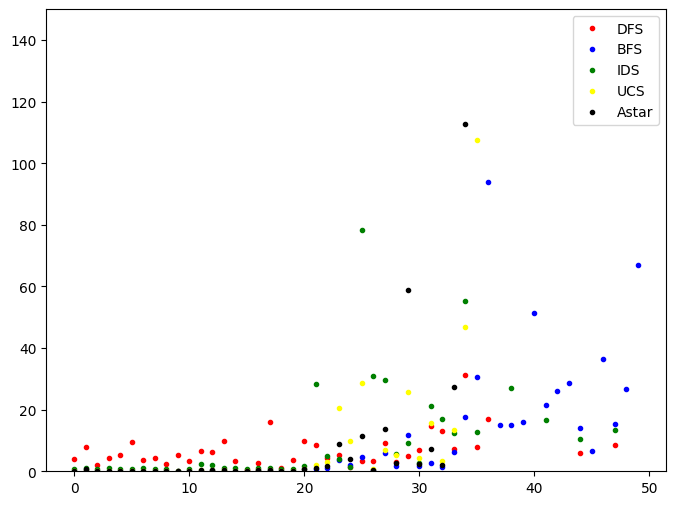

In [17]:
plt.figure(figsize=(8,6))
plt.ylim(0, 150)
plt.plot(rec.iloc[:,0], '.', color='red')
plt.plot(rec.iloc[:,1], '.', color='blue')
plt.plot(rec.iloc[:,2], '.', color='green')
plt.plot(rec.iloc[:,3], '.', color='yellow')
plt.plot(rec.iloc[:,4], '.', color='black')
plt.legend(['DFS', 'BFS', 'IDS', 'UCS', 'Astar'])

In [18]:
new = pd.read_csv('resultsNan.csv')

In [21]:
new.isna().sum().sum() /2

65.0